# Investigating Netflix Movies

Netflix! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity data analysis skills and dive into the entertainment industry.

We want to do some research on movies released in the 1990's. we'll delve into Netflix data and perform exploratory data analysis to better understand this awesome movie decade!

We have been supplied with the dataset **netflix_data.csv**, along with the following table detailing the column names and descriptions.


| Column        | Description                           |
|---------------|---------------------------------------|
| `show_id`     | The ID of the show                    |
| `type`        | Type of show                          |
| `title`       | Title of the show                     |
| `director`    | Director of the show                  |
| `cast`        | Cast of the show                      |
| `country`     | Country of origin                     |
| `date_added`  | Date added to Netflix                 |
| `release_year`| Year of Netflix release               |
| `duration`    | Duration of the show in minutes       |
| `description` | Description of the show               |
| `genre`       | Show genre                            |


In [ ]:

import pandas as pd
import matplotlib.pyplot as plt
#Create DataFrame 
# Think of netflix_df as a virtual spreadsheet created by the pandas library, and it holds all the data from your netflix_data.csv file in neat rows and columns.
netflix_df = pd.read_csv(r"C:\Users\HP\Investigating_Netflix_Movies\dataset\netflix_data.csv")
#Display the data 
netflix_df.head()

In [ ]:


# Filter for 1990s movies only
movies_90s = netflix_df[
    (netflix_df['type'] == 'Movie') & 
    (netflix_df['release_year'] >= 1990) & 
    (netflix_df['release_year'] < 2000)
]

# Clean 'duration' column — extract numeric values only
# Ensure all values are treated as strings first
movies_90s['duration_minutes'] = movies_90s['duration'].astype(str).str.extract(r'(\d+)').astype(float)


# Find the most frequent duration
most_common_duration = int(movies_90s['duration_minutes'].mode()[0])

# Save result
duration = most_common_duration

# Display it
print("Most common movie duration in the 1990s:", duration)


In [6]:

# Filter for Action genre and short movies (< 90 min)
short_action_movies = movies_90s[
    (movies_90s['genre'].str.contains("Action", na=False)) &
    (movies_90s['duration_minutes'] < 90)
]

# Save the count as an integer
short_movie_count = len(short_action_movies)

# Display result
print("Number of short action movies in the 1990s:", short_movie_count)

Number of short action movies in the 1990s: 7


# Dashboard: Exploring Netflix Movies from the 1990s

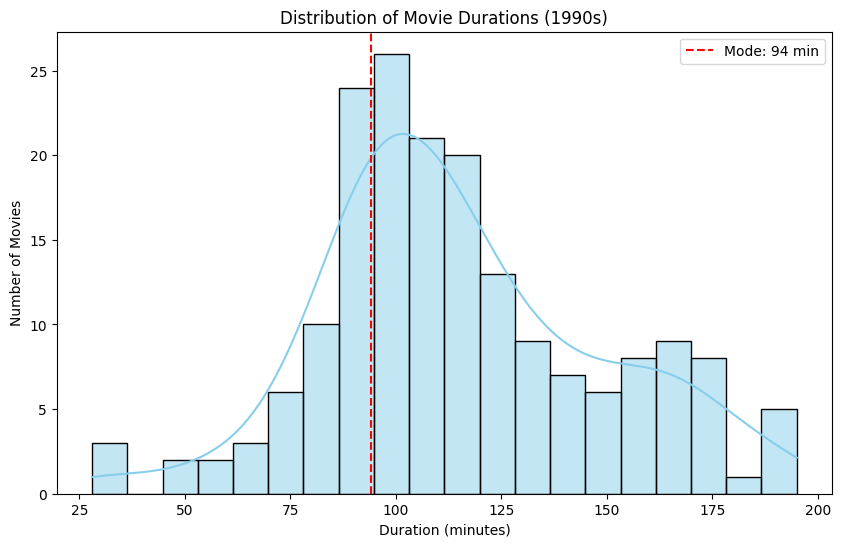

In [8]:
import seaborn as sns
plt.figure(figsize=(10,6))
sns.histplot(movies_90s['duration_minutes'], bins=20, kde=True, color='skyblue')
plt.axvline(duration, color='red', linestyle='--', label=f'Mode: {duration} min')
plt.title("Distribution of Movie Durations (1990s)")
plt.xlabel("Duration (minutes)")
plt.ylabel("Number of Movies")
plt.legend()
plt.show()


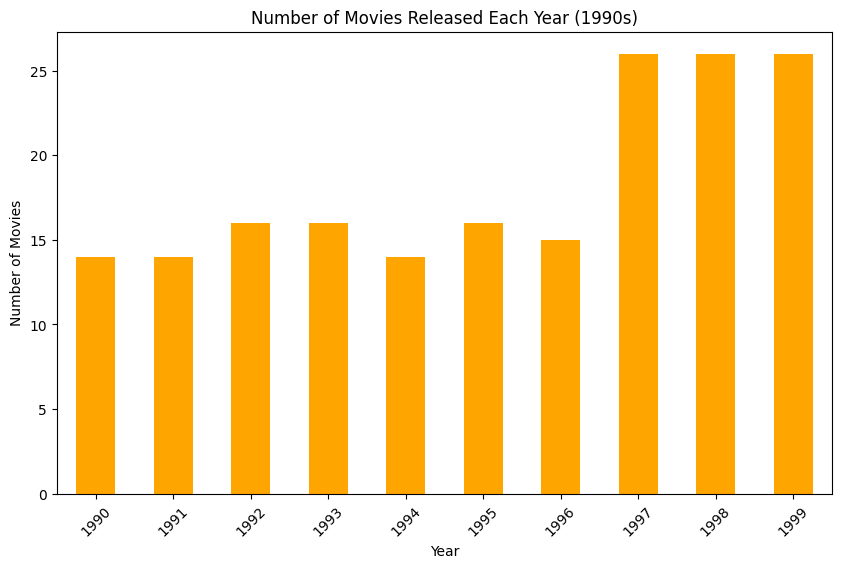

In [9]:
yearly_counts = movies_90s['release_year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
yearly_counts.plot(kind='bar', color='orange')
plt.title("Number of Movies Released Each Year (1990s)")
plt.xlabel("Year")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)
plt.show()


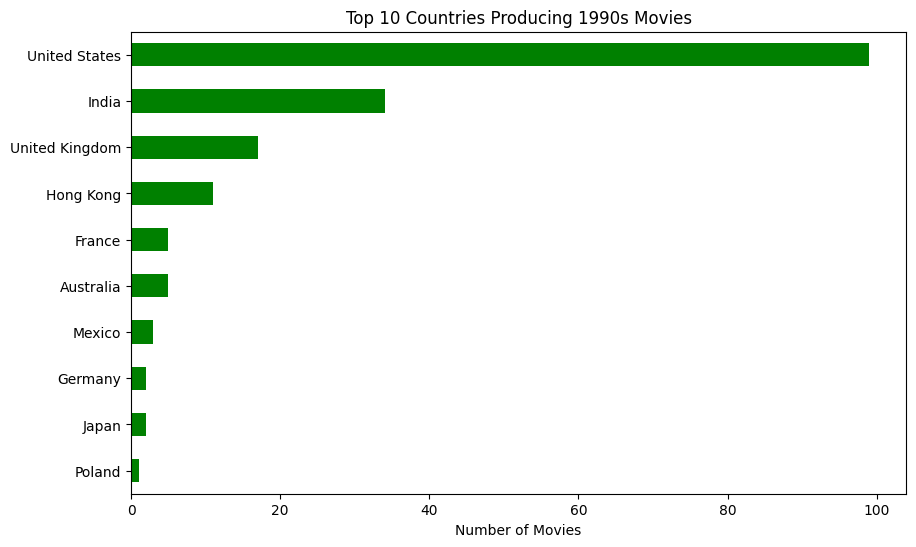

In [10]:
from collections import Counter

# Split and count countries
country_series = movies_90s['country'].dropna().str.split(', ')
flat_countries = [country for sublist in country_series for country in sublist]
country_counts = pd.Series(Counter(flat_countries)).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(10,6))
country_counts.plot(kind='barh', color='green')
plt.title("Top 10 Countries Producing 1990s Movies")
plt.xlabel("Number of Movies")
plt.gca().invert_yaxis()
plt.show()


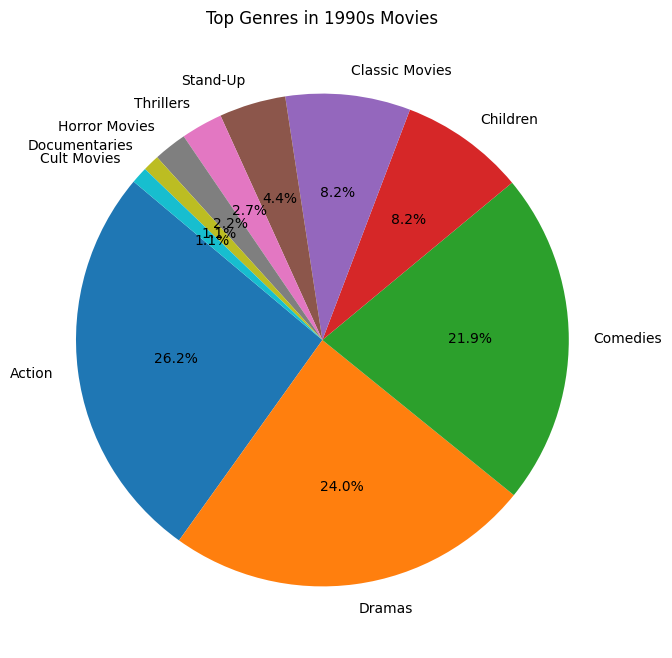

In [11]:
genre_counts = movies_90s['genre'].value_counts().head(10)
plt.figure(figsize=(8,8))
genre_counts.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Top Genres in 1990s Movies")
plt.ylabel('')
plt.show()
